In [1]:
import torch
from torch import nn
from matplotlib import pyplot as plt

Generate two circles with different coloured dots.

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [4]:
import pandas as pd
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

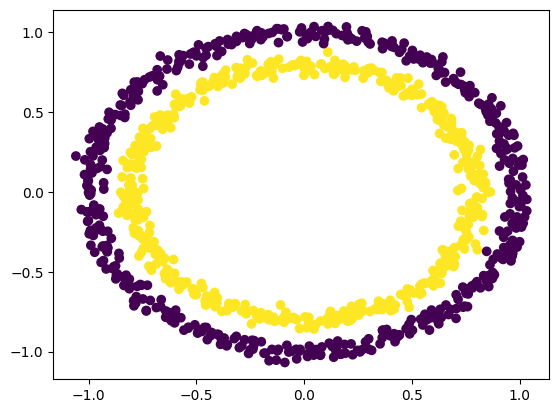

In [6]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

## Input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

Note that each element of `X` contains two features while `y` only contains 1.

## Turn data into tensors and create train and test splits

In [8]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
train_split = int(0.8*len(X))

In [10]:
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## Building a model

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

We can test the performance of our initialized model.

In [13]:
y_preds = model_0(X_test.to(device))
y_preds[:5], y_test[:5]

(tensor([[0.1322],
         [0.3713],
         [0.0587],
         [0.2258],
         [0.0286]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([1., 1., 1., 1., 0.]))

As we can see, the outputs doesn't comply on what our desired output is.

## Setup loss function and optimizer

In [14]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr=0.1)

In [15]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))*100
    return acc

## Training loop

In [16]:
y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[0.1322],
        [0.3713],
        [0.0587],
        [0.2258],
        [0.0286]], device='cuda:0', grad_fn=<SliceBackward0>)

In [17]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5330],
        [0.5918],
        [0.5147],
        [0.5562],
        [0.5072]], device='cuda:0', grad_fn=<SliceBackward0>)

In [18]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

## Building a training and testing loop

In [21]:
torch.manual_seed(42)

epochs = 100

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred_labels = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        y_test_logits = model_0(X_test).squeeze()
        y_test_pred_labels = torch.round(torch.sigmoid(y_test_logits))
        test_loss = loss_fn(y_test_pred_labels, y_test)
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss : {test_loss}")

Epoch: 0 | Train loss: 0.6927520632743835 | Test loss : 0.7751038670539856
Epoch: 10 | Train loss: 0.6927027702331543 | Test loss : 0.7863050699234009
Epoch: 20 | Train loss: 0.69266277551651 | Test loss : 0.7913050651550293
Epoch: 30 | Train loss: 0.6926299929618835 | Test loss : 0.7944056391716003
Epoch: 40 | Train loss: 0.6926032304763794 | Test loss : 0.7925061583518982
Epoch: 50 | Train loss: 0.6925809979438782 | Test loss : 0.7894055843353271
Epoch: 60 | Train loss: 0.6925628781318665 | Test loss : 0.7944055795669556
Epoch: 70 | Train loss: 0.6925477981567383 | Test loss : 0.7944055795669556
Epoch: 80 | Train loss: 0.692535400390625 | Test loss : 0.7982044816017151
Epoch: 90 | Train loss: 0.6925250291824341 | Test loss : 0.7982044816017151


Sadly, this model is only suited for datasets that can be divided by a line.

## Building a model through non-linearity

In [49]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features=10)
        self.layer_2 = nn.Linear(in_features = 10, out_features=10)
        self.layer_3 = nn.Linear(in_features = 10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [50]:
model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [51]:
loss_fn

BCEWithLogitsLoss()

In [52]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [53]:
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [54]:
torch.manual_seed(42)

epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits = model_2(X_train).squeeze()
    y_pred_labels = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        y_test_logits = model_2(X_test).squeeze()
        y_test_pred_labels = torch.round(torch.sigmoid(y_test_logits))
        test_loss = loss_fn(y_test_pred_labels, y_test)
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss : {test_loss}")

Epoch: 0 | Train loss: 0.6928543448448181 | Test loss : 0.8182616829872131
Epoch: 10 | Train loss: 0.6923917531967163 | Test loss : 0.8182616829872131
Epoch: 20 | Train loss: 0.6921928524971008 | Test loss : 0.7872560024261475
Epoch: 30 | Train loss: 0.6920623779296875 | Test loss : 0.7137359380722046
Epoch: 40 | Train loss: 0.6919385194778442 | Test loss : 0.6788193583488464
Epoch: 50 | Train loss: 0.6918154954910278 | Test loss : 0.670802116394043
Epoch: 60 | Train loss: 0.6916906833648682 | Test loss : 0.6913883686065674
Epoch: 70 | Train loss: 0.6915738582611084 | Test loss : 0.6915838718414307
Epoch: 80 | Train loss: 0.6914619207382202 | Test loss : 0.6934832334518433
Epoch: 90 | Train loss: 0.6913502216339111 | Test loss : 0.6934832334518433
Epoch: 100 | Train loss: 0.6912409067153931 | Test loss : 0.6934832334518433
Epoch: 110 | Train loss: 0.6911330819129944 | Test loss : 0.6934832334518433
Epoch: 120 | Train loss: 0.6910231113433838 | Test loss : 0.6934832334518433
Epoch: 130 

In [55]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test)))
y_preds[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

helper_functions.py already exists, skipping download


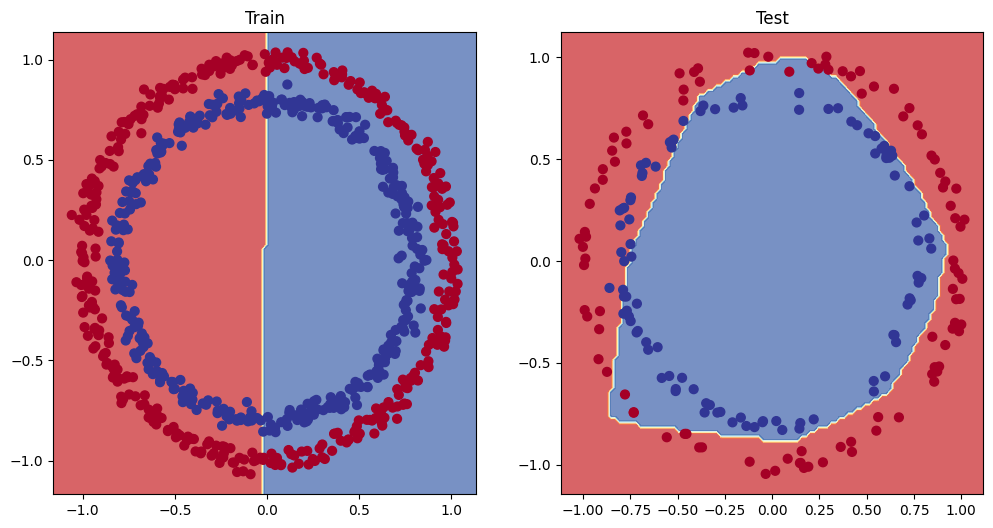

In [56]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity